### Step 1: Import Libraries
We begin by importing the necessary libraries:
- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- `sklearn` for machine learning tasks such as model training and evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


### Step 2: Load the Dataset
We load the dataset using `pandas`' `read_csv` function. The dataset contains tweets along with their sentiment labels. Let's take a look at the first few rows.


In [2]:
# Load the dataset
df = pd.read_csv('/content/Tweets.csv')

# Display the first few rows of the dataset
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Step 3: Data Preprocessing
In this step, we:
- Select the relevant columns (`text` and `airline_sentiment`)
- Convert the sentiment labels to a binary format (1 for positive sentiment, 0 for negative or neutral sentiment)
- Check for any missing values in the dataset.


In [3]:
# Remove unnecessary columns
df = df[['text', 'airline_sentiment']]

# Convert sentiments to binary: Positive = 1, Negative/Neutral = 0
df['sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Check for any missing values
df.isnull().sum()


<ipython-input-3-2182b32ce0f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


,0
text,0
airline_sentiment,0
sentiment,0


### Step 4: Split the Data
We split the dataset into training and testing sets using `train_test_split`. We allocate 80% of the data for training and 20% for testing.


In [4]:
# Split the data into training and testing sets
X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 5: Text Vectorization
We use `CountVectorizer` from `sklearn` to convert the text data into numerical features (a bag-of-words representation). The `stop_words='english'` parameter helps eliminate common English words that do not contribute much to the sentiment analysis.


In [5]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vec = vectorizer.transform(X_test)


### Step 6: Train a Naive Bayes Classifier
We use the `MultinomialNB` model from `sklearn` to train a Naive Bayes classifier on the transformed text data. This model is well-suited for text classification tasks.


In [6]:
# Initialize and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

### Step 7: Make Predictions
We use the trained model to predict the sentiment of the test data.


In [7]:
# Make predictions on the test data
y_pred = model.predict(X_test_vec)


### Step 8: Evaluate the Model
We evaluate the model using:
- `classification_report`: provides precision, recall, and F1-score for each class.
- `accuracy_score`: shows the overall accuracy of the model.
- A confusion matrix: visually shows the performance of the model in terms of true positives, false positives, true negatives, and false negatives.


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2469
           1       0.79      0.48      0.60       459

    accuracy                           0.90      2928
   macro avg       0.85      0.73      0.77      2928
weighted avg       0.89      0.90      0.89      2928

Accuracy: 0.8985655737704918


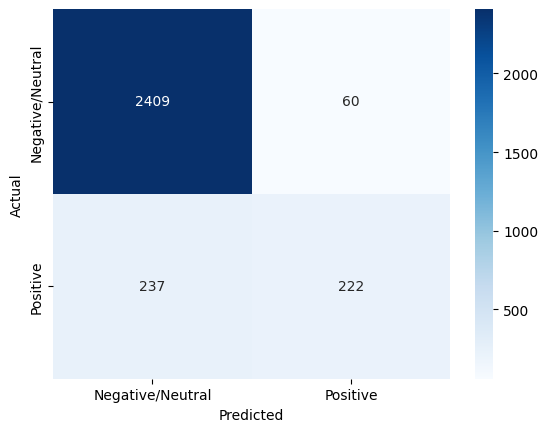

In [8]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative/Neutral', 'Positive'], yticklabels=['Negative/Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Step 9: Hyperparameter Tuning
We use `GridSearchCV` to search for the best hyperparameters for the Naive Bayes model, such as the smoothing parameter (`alpha`). This process helps improve model performance by selecting the optimal configuration.


In [9]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for the Naive Bayes model
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  # Smoothing parameter for Naive Bayes
}

# Initialize GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train_vec, y_train)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'alpha': 1.0}
Best Score: 0.8671449341443689


### Step 10: Model Improvement with TF-IDF
To enhance the feature extraction, we replace the CountVectorizer with `TfidfVectorizer`. This approach adjusts for the frequency of words and their importance within the corpus, which can improve sentiment analysis accuracy.


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2469
           1       0.96      0.05      0.10       459

    accuracy                           0.85      2928
   macro avg       0.91      0.53      0.51      2928
weighted avg       0.87      0.85      0.79      2928

Accuracy with TF-IDF: 0.8510928961748634


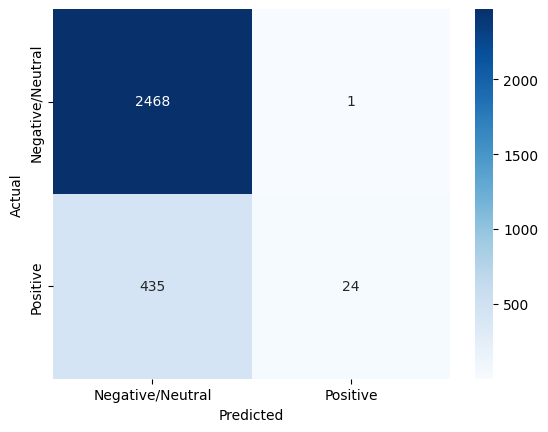

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Naive Bayes classifier again with TF-IDF features
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred_tfidf))
print(f'Accuracy with TF-IDF: {accuracy_score(y_test, y_pred_tfidf)}')

# Confusion Matrix
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative/Neutral', 'Positive'], yticklabels=['Negative/Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Step 11: Save and Deploy the Model
After finalizing the model, we save it using `joblib` to avoid retraining the model in the future. This saved model can be easily loaded and used for making predictions on new data.


In [11]:
import joblib

# Save the final model
joblib.dump(model_tfidf, 'sentiment_model.pkl')

# Load the model (if needed)
loaded_model = joblib.load('sentiment_model.pkl')

# Use the loaded model for prediction (example)
new_tweet = ["The flight was amazing and the service was great!"]
new_tweet_vec = tfidf_vectorizer.transform(new_tweet)
prediction = loaded_model.predict(new_tweet_vec)
print(f"Sentiment: {'Positive' if prediction[0] == 1 else 'Negative/Neutral'}")


Sentiment: Positive


### Summary
In this project, we:
- Performed data preprocessing on the Twitter US Airline Sentiment dataset
- Converted sentiment labels to a binary format
- Trained a Naive Bayes classifier using bag-of-words features
- Evaluated the model using accuracy, precision, recall, and confusion matrix

This model can be further improved by experimenting with different vectorization techniques (e.g., TF-IDF), or trying different classifiers (e.g., Logistic Regression, SVM).


### Final Thoughts
We have now built a sentiment analysis model for the Twitter US Airline Sentiment dataset. The model can predict whether a tweet expresses positive or negative/neutral sentiment. The following improvements could further enhance the model:
- Trying more advanced machine learning algorithms such as SVM or Random Forest.
- Implementing deep learning models like LSTM for better text representation.
- Gathering more data and retraining the model for improved generalization.

With this model, you can start deploying it to analyze real-time sentiment or build an interactive web application.
